In [11]:
graphics_toolkit gnuplot
pkg load symbolic

## Basic Signal Generation in MATLAB:

## Unit Step Function:
The Heaviside step function, or the unit step function, usually denoted by u, is a
discontinuous function whose value is zero for negative argument and one for positive
argument

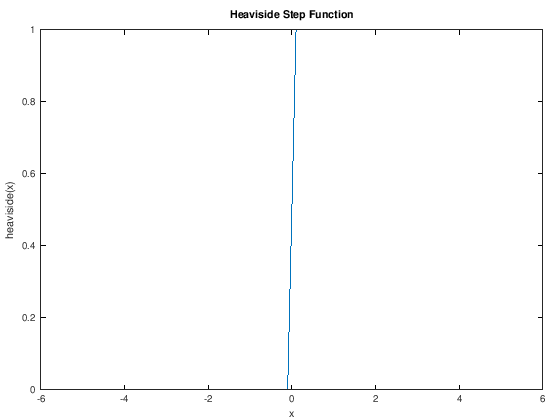

In [32]:
x = -5:0.1:5;
y = heaviside(x);
plot(x, y);
xlabel('x');
ylabel('heaviside(x)');
title('Heaviside Step Function');
%grid on;

## ???

In [36]:
syms t tau
H = int(dirac(tau), tau, -inf, t);
pretty(H)
display(H)

  θ(t)
H = (sym) θ(t)


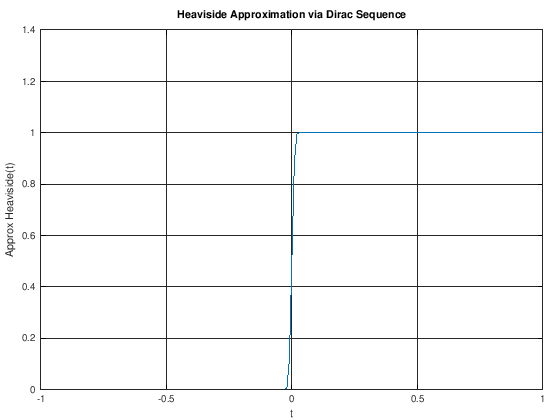

In [40]:
t = -1:0.01:1;
epsilon = 0.01;

delta_approx = @(t) (1 / (epsilon * sqrt(pi))) * exp(-t.^2 / epsilon^2);
H_approx = cumtrapz(t, delta_approx(t));  % Numerical integral

plot(t, H_approx);
xlabel('t');
ylabel('Approx Heaviside(t)');
title('Heaviside Approximation via Dirac Sequence');
grid on;

# double in the Impulse Code?
In the context of your impulse sequence:

matlab
Copy
Edit
x = double(n == k);
Here, n == k returns a logical array (1 for true, 0 for false), but using double converts this logical array into numeric values: 1 for true and 0 for false. This is necessary for summing the impulses as we need them to be in numeric form.

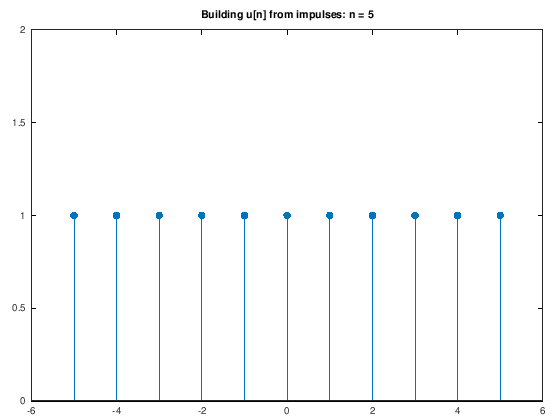

In [52]:
n = -5:5;
step_from_impulses = zeros(size(n));

figure;
for k = 1:length(n)
    impulse = double(n == n(k));
    step_from_impulses = step_from_impulses + impulse;
    
    stem(n, step_from_impulses, 'filled');
    ylim([0 2]);
    title(['Building u[n] from impulses: n = ', num2str(n(k))]);
    pause(0.3);
end

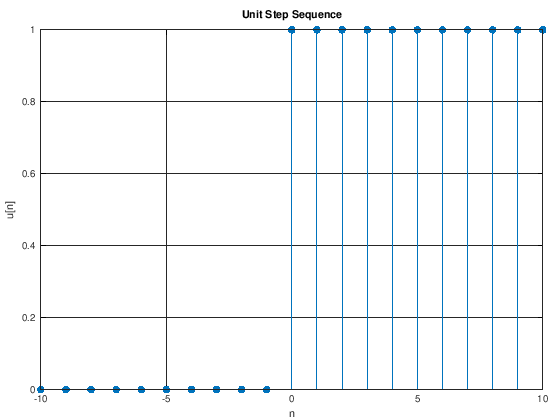

In [54]:
n = -10:10;                  % Define index range
u = double(n >= 0);          % Unit step: 0 for n<0, 1 for n>=0

stem(n, u, 'filled');        % Plot as discrete-time signal
xlabel('n');
ylabel('u[n]');
title('Unit Step Sequence');
grid on;

Awesome — you're looking for a sum of unit impulses from 
𝑛
=
−
5
n=−5 to 
𝑛
=
5
n=5. That is:

𝑥
[
𝑛
]
=
∑
𝑘
=
−
5
5
𝛿
[
𝑛
−
𝑘
]
x[n]= 
k=−5
∑
5
​
 δ[n−k]
Which means: a unit impulse (value 1) at every integer from -5 to 5, and 0 elsewhere.

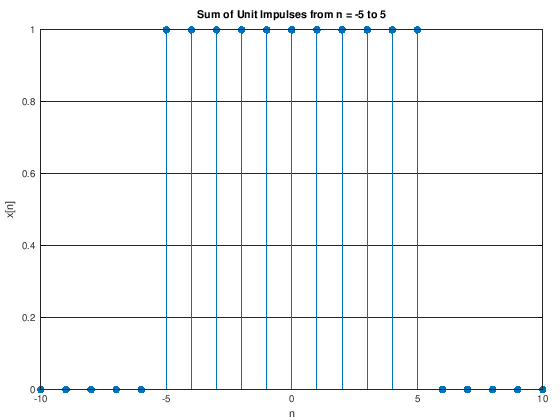

In [56]:
n = -10:10;                          % Full index range (wider than -5 to 5)
x = zeros(size(n));                 % Initialize with zeros

% Loop over desired impulse positions
for k = -5:5
    x = x + double(n == k);
end

stem(n, x, 'filled');
xlabel('n');
ylabel('x[n]');
title('Sum of Unit Impulses from n = -5 to 5');
grid on;

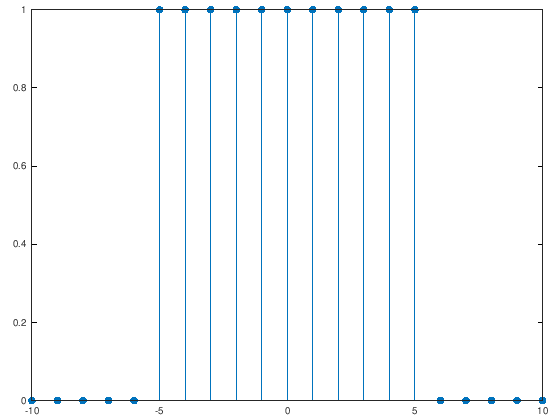

In [58]:
n = -10:10;
x = ismember(n, -5:5);     % 1 where n is in [-5, ..., 5], else 0

stem(n, x, 'filled');

## Dirac

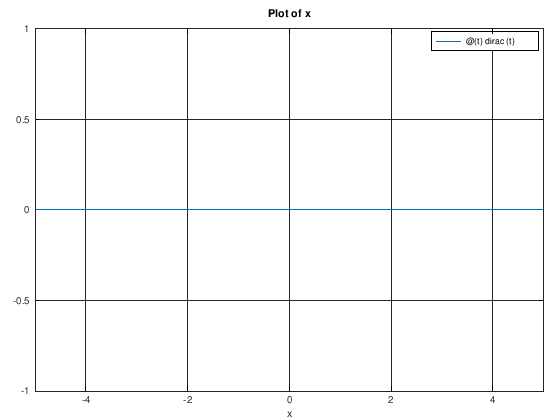

In [79]:
syms t
x = dirac(t); % Represents the Dirac delta function at t = 0
fplot(x); % Plot the function over the default range [-5, 5]
title('Plot of x');
xlabel('x');
grid on;

### The Dirac delta function can be used for sampling a function in mathematical theory, but in MATLAB, the symbolic dirac function alone is not directly suitable for numerical sampling. Here's why and how to work around it:

Why the Symbolic dirac Function Isn’t Directly Usable for Sampling
Symbolic vs. Numerical Limitations:

The symbolic dirac function represents a mathematical abstraction (a distribution) and cannot be evaluated numerically at specific points. For example, dirac(0) returns Inf, which is not practical for numerical computations.

Sampling requires discrete or finite representations, which the symbolic Dirac delta does not provide.

Integral-Based Sampling:

Theoretically, sampling a function 
f
(
t
)
f(t) at 
t
=
a
t=a is done via the integral:

f
(
a
)
=
∫
−
∞
∞
f
(
t
)
δ
(
t

Integral-Based Sampling:

Theoretically, sampling a function 
f
(
t
)
f(t) at 
t
=
a
t=a is done via the integral:

f
(
a
)
=
∫
−
∞
∞
f
(
t
)
δ
(
t
−
a
)
 
d
t
f(a)=∫ 
−∞
∞
 f(t)δ(t−a)dt
Symbolically, MATLAB can compute this integral:


In [33]:
syms t ;
f = sin(t); % Example function
sampled_value = int(f * dirac(t - pi/2), t, -inf, inf);
disp(sampled_value);

    double_to_sym_heuristic at line 50 column 7
    sym at line 384 column 13
    minus at line 47 column 5

  1


### Practical Sampling Methods in MATLAB
To numerically sample a function using a Dirac delta approximation, use these approaches:

1. Discrete Impulse (Kronecker Delta)
For discrete-time signals, use a vector with a 1 at the desired sample point:

matlab
t = 0:0.1:10; % Time vector
delta = zeros(size(t));
delta(t == 5) = 1; % Impulse at t = 5 (sample index 50)
sampled_signal = f(t) .* delta; % Replace f(t) with your function

In [44]:
t = 0:0.1:10; % Time vector 
delta = zeros(size(t)); 
delta(t == 5) = 1; % Impulse at t = 5 (sample index 50)
sampled_signal = sin(t).*delta; % Replace f(t) with your function
disp(sampled_signal);

 Columns 1 through 8:

        0        0        0        0        0        0        0        0

 Columns 9 through 16:

        0        0        0        0        0        0        0        0

 Columns 17 through 24:

        0        0        0        0        0        0        0        0

 Columns 25 through 32:

        0        0        0        0        0        0        0        0

 Columns 33 through 40:

        0        0        0        0        0        0        0        0

 Columns 41 through 48:

        0        0        0        0        0        0        0        0

 Columns 49 through 56:

        0        0  -0.9589        0        0        0        0        0

 Columns 57 through 64:

        0        0        0        0        0        0        0        0

 Columns 65 through 72:

        0        0        0        0        0        0        0        0

 Columns 73 through 80:

        0        0        0        0        0        0        0        0

 Columns 81 t

## Sampling a Sine Wave


In [50]:
t = 0:0.01:10;
f = sin(t); % Function to sample
a = 5; % Sample at t = 5

% Discrete impulse method
delta = (t == a);
sampled_value_discrete = f(t == a); % Direct indexing

% Gaussian approximation method
sigma = 0.01;
delta_approx = exp(-(t - a).^2 / (2*sigma^2)) / (sigma * sqrt(2*pi));
sampled_value_gaussian = trapz(t, f .* delta_approx);
disp(['Discrete sampling: ', num2str(sampled_value_discrete)]);
disp(['Gaussian approximation: ', num2str(sampled_value_gaussian)]);

Discrete sampling: -0.95892
Gaussian approximation: -0.95888


delta =

   0   0   0   0   0   1   0   0   0   0   0



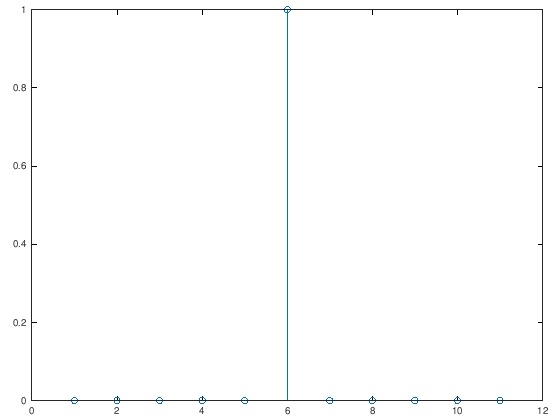

In [70]:
n = -5:5;
delta = double(n == 0)
stem(delta)

u =

   0   0   0   0   0   1   1   1   1   1   1



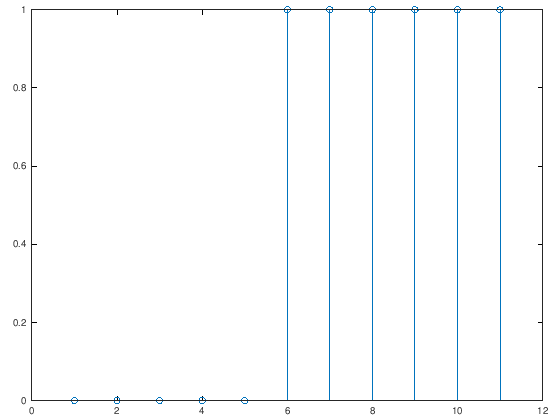

In [66]:
n = -5:5;
u = double(n >= 0)
stem(u)

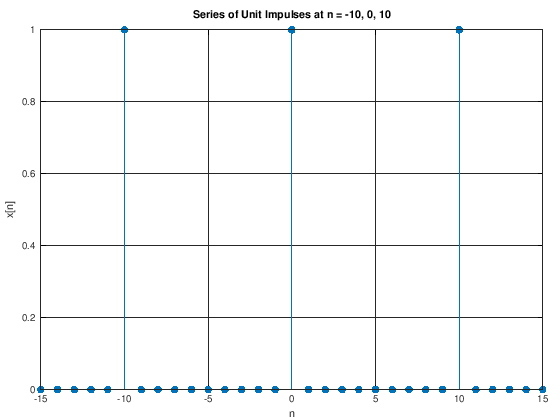

In [68]:
n = -15:15;                      % Index range
x = double(n == -10) + ...
    double(n == 0) + ...
    double(n == 10);             % Series of impulses

stem(n, x, 'filled');
xlabel('n');
ylabel('x[n]');
title('Series of Unit Impulses at n = -10, 0, 10');
grid on;

## Shifted Delta Function
To create and visualize shifted delta functions (e.g., 
δ
(
t
−
a
)
δ(t−a)):

In [17]:
syms t
a = 2; % Shift parameter
x_shifted = dirac(t - a); % Shifted delta function
%stem(x_shifted, [-10, 10]);   % forbiten
fplot(x_shifted, [-10, 10]);

error: stem: X and Y must be numeric
error: called from
    __stem__>check_stem_arg at line 272 column 7
    __stem__ at line 41 column 49
    stem at line 132 column 8


# Periodic Sequences in MATLAB:

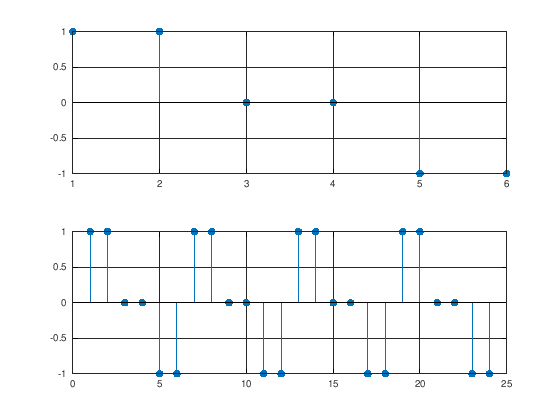

In [11]:
x=[1 1 0 0 -1 -1];
n=1:length(x);
subplot(2,1,1)
stem(n,x,'fill', 'Linewidth',2),grid on
y=repmat(x,1,4); %repmat is the command which is used to repeat a matrix or a vector.
n1=1:length(y);
subplot(2,1,2)
stem(n1,y,'fill', 'Linewidth',2),grid on


## Energy and Power of Continuous Time Signal in MATLAB:
The term signal energy of a signal is defined as the area under the square of

magnitude of the signal. The signal energy of a continuous time signal
Consider the following code to find the every of a signal
is given as

$\int_{a}^{b} |f(x)|^2 \, dx$

over the interval


In [1]:
t=0:0.0001:10;
x=2*t;
xsq=x.^2;
Ex=trapz(t,abs(xsq)) %


Ex = 1333.3


## ολοκλήρωση
## what is trapz in matlab

In MATLAB, the trapz function performs numerical integration using the trapezoidal rule. This method approximates the integral of a function by dividing the area under its curve into trapezoids and summing their areas. Here’s an overview:

Syntax
Q = trapz(Y): Computes the integral of Y assuming unit spacing between data points.

Q = trapz(X, Y): Computes the integral of Y with respect to coordinates or spacing defined in X.

Q = trapz(___, dim): Specifies the dimension along which to integrate for multidimensional arrays.

Functionality
For Vectors: If Y is a vector, trapz(Y) computes the approximate integral of Y.

For Matrices: If Y is a matrix, trapz(Y) integrates over each column and returns a row vector of integration values.

For Multidimensional Arrays: The function integrates along the first nonsingleton dimension unless specified otherwise using the dim parameter.

Examples
Unit Spacing:

matlab
Y = [2 4 8 16 32];
Q = trapz(Y); % Integrates with unit spacing
disp(Q);
This computes the integral of Y assuming equal spacing between points.

Custom Spacing:

matlab
X = 0:pi/100:pi/2;
Y = cos(X);
Q = trapz(X, Y); % Integrates with respect to X
disp(Q);
Integration Along Specific Dimension:

matlab
Y = [1 2 3; 4 5 6; 7 8 9];
Q = trapz(Y, 2); % Integrates along rows
disp(Q);


In [8]:
Y = [2 4 8 16 32];
Q = trapz(Y); % Integrates with unit spacing
disp(Q);

45


In [10]:

X = 0:pi/100:pi/2;
Y = cos(X);
Q = trapz(X, Y); % Integrates with respect to X
disp(Q);
%Integration Along Specific Dimension:


0.9999


In [13]:
X = 0:2*pi/100:2*pi;
Y = cos(X);
Q = trapz(X, Y); % Integrates with respect to X
disp(Q);

-6.9389e-17


In [19]:
X = 0:2*pi/100:2*pi;
Y = cos(X).^2;
Q = trapz(X, Y); % Integrates with respect to X
disp(Q);

3.1416


## MATLAB, you can integrate the complex exponential function using the integral function. Here's how you can do it:

Example: Integrate from 0 to
matlab
Copy
% Define the integrand as an anonymous function
f = @(x) exp(1i * x);

% Perform the integration from 0 to pi
result = integral(f, 0, pi, 'ArrayValued', true);

% Display the result
disp('The integral of e^(ix) from 0 to pi is:');
disp(result);
Explanation:
exp(1i * x) represents , where 1i is MATLAB's notation for the imaginary unit .

integral(f, 0, pi, 'ArrayValued', true) computes the integral of from to .

The 'ArrayValued', true option allows the integration of array-valued functions (useful for complex-valued functions).

The result is a complex number, which MATLAB displays in the form .

Expected Output:
The exact result of is:

MATLAB will output something like:

Copy
The integral of e^(ix) from 0 to pi is:
   0.0000 + 2.0000i
Integration Over a Different Interval:
If you want to integrate over a different range, say from a to b, modify the limits in the integral function:

matlab
Copy
a = 0;
b = 2*pi;
result = integral(f, a, b, 'ArrayValued', true);
disp(['The integral of e^(ix) from ', num2str(a), ' to ', num2str(b), ' is:']);
disp(result);
For , the result should be , as the function completes a full period. MATLAB will output something like:

Copy
The integral of e^(ix) from 0 to 6.2832 is:
  -0.0000 + 0.0000i
This approach works for any finite interval . Let me know if you need further clarification!

New chatI